In [1]:
import pandas as pd

In [2]:
data_path = "C:/Users/angad/Desktop/credit_default_risk_project/data/default of credit card clients.xls"

df_raw = pd.read_excel(data_path, header=1)

In [3]:
df_raw.shape

(30000, 25)

In [4]:
df_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df = df_raw.copy()

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
new_columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("/", "_")
)

df.columns = new_columns

In [8]:
df = df.rename(columns={"default_payment_next_month": "default"})

In [9]:
df[["default"]].head()

,default
0,1
1,1
2,0
3,0
4,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [11]:
df.isna().sum()

id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set(style="whitegrid")

In [14]:
df["default"].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [15]:
df["default"].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

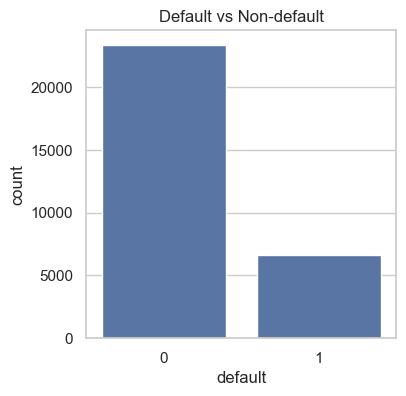

In [16]:
plt.figure(figsize=(4, 4))
sns.countplot(x="default", data=df)
plt.title("Default vs Non-default")
plt.show()

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [18]:
target_col = "default"

feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols]
y = df[target_col]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

In [22]:
X_train.shape, X_val.shape, X_test.shape

((18000, 24), (6000, 24), (6000, 24))

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [24]:
logreg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            n_jobs=-1
        ))
    ]
)

In [25]:
logreg_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [26]:
y_val_proba_logreg = logreg_pipeline.predict_proba(X_val)[:, 1]
roc_auc_logreg = roc_auc_score(y_val, y_val_proba_logreg)

roc_auc_logreg

0.7255411202355205

In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgbm_model = LGBMClassifier(
    n_estimators=500,       # number of trees
    learning_rate=0.05,    # smaller = slower but usually better
    max_depth=-1,          # let it choose depth automatically
    subsample=0.9,         # use 90% of rows per tree (adds randomness)
    colsample_bytree=0.9,  # use 90% of columns per tree
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

In [29]:
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3982, number of negative: 14018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3514
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221222 -> initscore=-1.258558
[LightGBM] [Info] Start training from score -1.258558


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
y_val_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

roc_auc_lgbm = roc_auc_score(y_val, y_val_proba_lgbm)
roc_auc_lgbm

0.7794879303913791

In [32]:
from catboost import CatBoostClassifier

In [33]:
cat_model = CatBoostClassifier(
    depth=6,
    learning_rate=0.05,
    n_estimators=500,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100  # prints progress every 100 iterations
)

In [34]:
cat_model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

0:	test: 0.7405633	best: 0.7405633 (0)	total: 145ms	remaining: 1m 12s
100:	test: 0.7807187	best: 0.7810375 (95)	total: 636ms	remaining: 2.51s
200:	test: 0.7830480	best: 0.7834252 (166)	total: 1.14s	remaining: 1.7s
300:	test: 0.7848433	best: 0.7848433 (300)	total: 1.62s	remaining: 1.07s
400:	test: 0.7850571	best: 0.7855430 (345)	total: 2.11s	remaining: 521ms
499:	test: 0.7845067	best: 0.7855430 (345)	total: 2.58s	remaining: 0us

bestTest = 0.7855430135
bestIteration = 345

Shrink model to first 346 iterations.


In [35]:
y_val_proba_cat = cat_model.predict_proba(X_val)[:, 1]

roc_auc_cat = roc_auc_score(y_val, y_val_proba_cat)
roc_auc_cat

0.785543013456869

In [36]:
print(f"Logistic Regression ROC AUC: {roc_auc_logreg:.4f}")
print(f"LightGBM ROC AUC:           {roc_auc_lgbm:.4f}")
print(f"CatBoost ROC AUC:           {roc_auc_cat:.4f}")

Logistic Regression ROC AUC: 0.7255
LightGBM ROC AUC:           0.7795
CatBoost ROC AUC:           0.7855


In [37]:
df_fe = df.copy()

In [38]:
df_fe.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [39]:
bill_cols = [col for col in df_fe.columns if col.startswith("bill_amt")]
pay_cols = [col for col in df_fe.columns if col.startswith("pay_amt")]
pay_status_cols = [col for col in df_fe.columns 
                   if col.startswith("pay_") and "amt" not in col and col != "default"]
                   
bill_cols, pay_cols, pay_status_cols

(['bill_amt1',
  'bill_amt2',
  'bill_amt3',
  'bill_amt4',
  'bill_amt5',
  'bill_amt6'],
 ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
 ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'])

In [40]:
import numpy as np

In [41]:
df_fe["avg_bill_amt"] = df_fe[bill_cols].mean(axis=1)
df_fe["bill_amt_std"] = df_fe[bill_cols].std(axis=1)
df_fe["max_bill_amt"] = df_fe[bill_cols].max(axis=1)

In [42]:
df_fe["avg_pay_amt"] = df_fe[pay_cols].mean(axis=1)
df_fe["pay_amt_std"] = df_fe[pay_cols].std(axis=1)

In [43]:
df_fe["credit_utilisation_max"] = df_fe["max_bill_amt"] / df_fe["limit_bal"].replace(0, np.nan)
df_fe["credit_utilisation_max"] = df_fe["credit_utilisation_max"].fillna(0)

In [44]:
pay_ratio_cols = []

for i in range(1, 7):
    bill_col = f"bill_amt{i}"
    pay_col = f"pay_amt{i}"
    ratio_col = f"pay_ratio_{i}"
    
    # avoid divide by zero: replace 0 bill with NaN, then fill with 0 later
    df_fe[ratio_col] = df_fe[pay_col] / df_fe[bill_col].replace(0, np.nan)
    pay_ratio_cols.append(ratio_col)

df_fe[pay_ratio_cols] = df_fe[pay_ratio_cols].fillna(0)

In [45]:
df_fe["pay_ratio_mean"] = df_fe[pay_ratio_cols].mean(axis=1)
df_fe["pay_ratio_min"] = df_fe[pay_ratio_cols].min(axis=1)
df_fe["pay_ratio_max"] = df_fe[pay_ratio_cols].max(axis=1)

In [46]:
df_fe["num_months_late"] = (df_fe[pay_status_cols] > 0).sum(axis=1)
df_fe["num_months_very_late"] = (df_fe[pay_status_cols] >= 2).sum(axis=1)
df_fe["max_delay"] = df_fe[pay_status_cols].max(axis=1)

In [47]:
df_fe[[
    "limit_bal",
    "avg_bill_amt", "bill_amt_std", "max_bill_amt", "credit_utilisation_max",
    "avg_pay_amt", "pay_amt_std",
    "pay_ratio_mean", "pay_ratio_min", "pay_ratio_max",
    "num_months_late", "num_months_very_late", "max_delay",
    "default"
]].head()

,limit_bal,avg_bill_amt,bill_amt_std,max_bill_amt,credit_utilisation_max,avg_pay_amt,pay_amt_std,pay_ratio_mean,pay_ratio_min,pay_ratio_max,num_months_late,num_months_very_late,max_delay,default
0,20000,1284.000000,1761.633219,3913,0.195650,114.833333,281.283072,0.037019,0.000000,0.222115,2,2,2,1
1,120000,2846.166667,637.967841,3455,0.028792,833.333333,752.772653,0.311916,0.000000,0.613309,2,2,2,1
2,90000,16942.166667,6064.518593,29239,0.324878,1836.333333,1569.815488,0.115141,0.051917,0.321564,0,0,0,0
3,50000,38555.666667,10565.793518,49291,0.985820,1398.000000,478.058155,0.036396,0.024345,0.042562,0,0,0,0
4,50000,18223.166667,10668.590074,35835,0.716700,9841.500000,13786.230736,1.246958,0.035492,6.469312,0,0,0,0


In [48]:
target_col = "default"

feature_cols_fe = [col for col in df_fe.columns if col != target_col]

X_fe = df_fe[feature_cols_fe]
y_fe = df_fe[target_col]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_fe_train_val, X_fe_test, y_fe_train_val, y_fe_test = train_test_split(
    X_fe, y_fe,
    test_size=0.2,
    random_state=42,
    stratify=y_fe
)

X_fe_train, X_fe_val, y_fe_train, y_fe_val = train_test_split(
    X_fe_train_val, y_fe_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_fe_train_val
)

X_fe_train.shape, X_fe_val.shape, X_fe_test.shape

((18000, 42), (6000, 42), (6000, 42))

In [51]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [52]:
lgbm_fe_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1
)

lgbm_fe_model.fit(X_fe_train, y_fe_train)

[LightGBM] [Info] Number of positive: 3982, number of negative: 14018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7364
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221222 -> initscore=-1.258558
[LightGBM] [Info] Start training from score -1.258558


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [53]:
y_fe_val_proba_lgbm = lgbm_fe_model.predict_proba(X_fe_val)[:, 1]
roc_auc_lgbm_fe = roc_auc_score(y_fe_val, y_fe_val_proba_lgbm)
roc_auc_lgbm_fe

0.7845025480275908

In [54]:
from catboost import CatBoostClassifier

In [55]:
cat_fe_model = CatBoostClassifier(
    depth=6,
    learning_rate=0.05,
    n_estimators=500,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    verbose=100
)

cat_fe_model.fit(
    X_fe_train, y_fe_train,
    eval_set=(X_fe_val, y_fe_val),
    use_best_model=True
)

0:	test: 0.7457135	best: 0.7457135 (0)	total: 6.35ms	remaining: 3.17s
100:	test: 0.7835249	best: 0.7835249 (100)	total: 565ms	remaining: 2.23s
200:	test: 0.7860626	best: 0.7860626 (200)	total: 1.11s	remaining: 1.66s
300:	test: 0.7856378	best: 0.7864928 (217)	total: 1.67s	remaining: 1.1s
400:	test: 0.7860599	best: 0.7864928 (217)	total: 2.23s	remaining: 550ms
499:	test: 0.7858152	best: 0.7864928 (217)	total: 2.81s	remaining: 0us

bestTest = 0.7864928494
bestIteration = 217

Shrink model to first 218 iterations.


In [56]:
y_fe_val_proba_cat = cat_fe_model.predict_proba(X_fe_val)[:, 1]
roc_auc_cat_fe = roc_auc_score(y_fe_val, y_fe_val_proba_cat)
roc_auc_cat_fe

0.7864928493803731

In [57]:
print("OLD models (no engineered features)")
print(f"  LightGBM ROC AUC: {roc_auc_lgbm:.4f}")
print(f"  CatBoost ROC AUC: {roc_auc_cat:.4f}")

print("\nNEW models (with engineered features)")
print(f"  LightGBM ROC AUC: {roc_auc_lgbm_fe:.4f}")
print(f"  CatBoost ROC AUC: {roc_auc_cat_fe:.4f}")

OLD models (no engineered features)
  LightGBM ROC AUC: 0.7795
  CatBoost ROC AUC: 0.7855

NEW models (with engineered features)
  LightGBM ROC AUC: 0.7845
  CatBoost ROC AUC: 0.7865


In [58]:
from sklearn.metrics import roc_curve

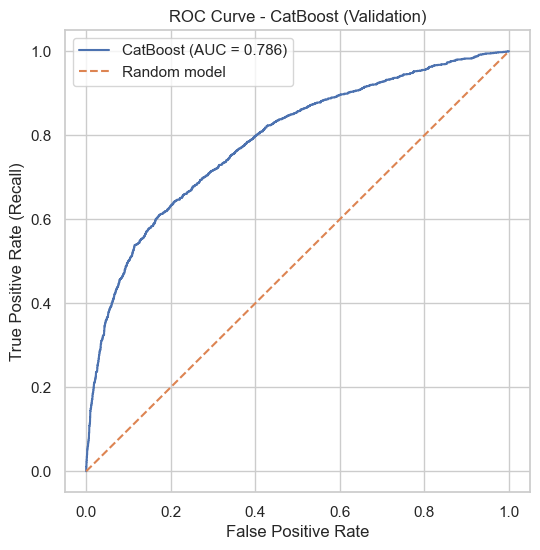

In [59]:
import matplotlib.pyplot as plt

fpr, tpr, roc_thresholds = roc_curve(y_fe_val, y_fe_val_proba_cat)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {roc_auc_cat_fe:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - CatBoost (Validation)")
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [61]:
precision, recall, pr_thresholds = precision_recall_curve(
    y_fe_val, y_fe_val_proba_cat
)

avg_precision = average_precision_score(y_fe_val, y_fe_val_proba_cat)
avg_precision

0.5652138955033796

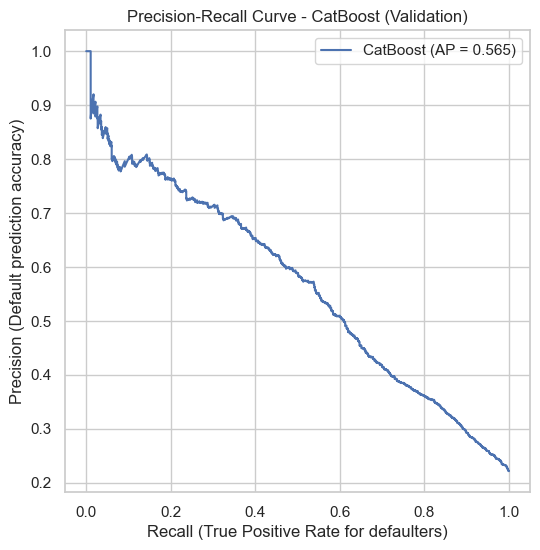

In [62]:
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f"CatBoost (AP = {avg_precision:.3f})")
plt.xlabel("Recall (True Positive Rate for defaulters)")
plt.ylabel("Precision (Default prediction accuracy)")
plt.title("Precision-Recall Curve - CatBoost (Validation)")
plt.legend()
plt.show()

In [63]:
y_pred_default = (y_fe_val_proba_cat >= 0.5).astype(int)

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
thresholds = np.linspace(0.1, 0.9, 81)  # 0.10, 0.11, ..., 0.90

cost_fp = 1.0
cost_fn = 5.0

threshold_list = []
cost_list = []

for thr in thresholds:
    y_pred_thr = (y_fe_val_proba_cat >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_fe_val, y_pred_thr).ravel()
    
    total_cost = cost_fp * fp + cost_fn * fn
    
    threshold_list.append(thr)
    cost_list.append(total_cost)

In [66]:
best_index = int(np.argmin(cost_list))
best_threshold = threshold_list[best_index]
best_cost = cost_list[best_index]

best_threshold, best_cost

(0.14, 3204.0)

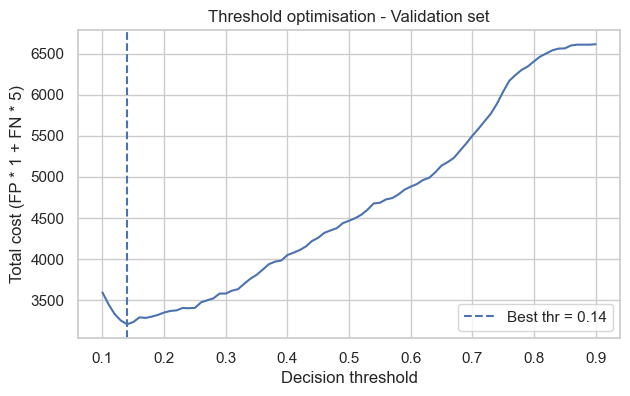

In [67]:
plt.figure(figsize=(7, 4))
plt.plot(threshold_list, cost_list)
plt.axvline(best_threshold, linestyle="--", label=f"Best thr = {best_threshold:.2f}")
plt.xlabel("Decision threshold")
plt.ylabel("Total cost (FP * 1 + FN * 5)")
plt.title("Threshold optimisation - Validation set")
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import classification_report

In [69]:
y_val_pred_best = (y_fe_val_proba_cat >= best_threshold).astype(int)

tn, fp, fn, tp = confusion_matrix(y_fe_val, y_val_pred_best).ravel()
print("Confusion matrix at best threshold:")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}\n")

print("Classification report at best threshold:")
print(classification_report(y_fe_val, y_val_pred_best, digits=3))

Confusion matrix at best threshold:
TN: 2714, FP: 1959, FN: 249, TP: 1078

Classification report at best threshold:
              precision    recall  f1-score   support

           0      0.916     0.581     0.711      4673
           1      0.355     0.812     0.494      1327

    accuracy                          0.632      6000
   macro avg      0.635     0.697     0.602      6000
weighted avg      0.792     0.632     0.663      6000



In [70]:
from sklearn.metrics import brier_score_loss

In [71]:
brier_cat = brier_score_loss(y_fe_val, y_fe_val_proba_cat)
brier_cat

0.13320856667406625

In [72]:
from sklearn.calibration import calibration_curve

In [73]:
prob_true, prob_pred = calibration_curve(
    y_fe_val,
    y_fe_val_proba_cat,
    n_bins=10,
    strategy="uniform"
)

prob_true, prob_pred

(array([0.06887202, 0.14802933, 0.22580645, 0.37400531, 0.45454545,
        0.58083832, 0.62389381, 0.75486381, 0.86      , 1.        ]),
 array([0.06686615, 0.14144005, 0.2444276 , 0.34643087, 0.44763608,
        0.54582252, 0.6580611 , 0.74457498, 0.82636549, 0.91035252]))

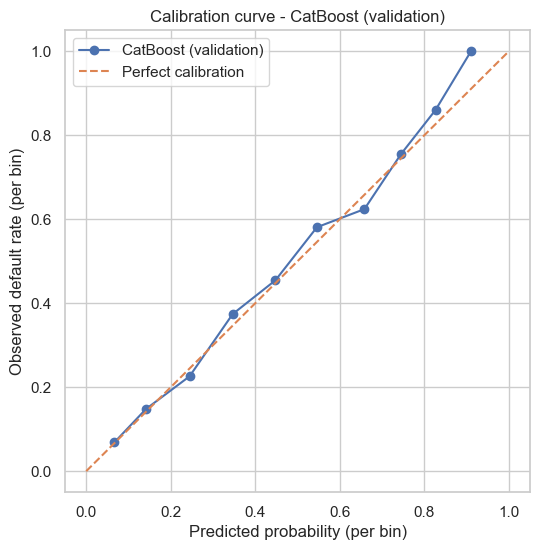

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# model points
plt.plot(prob_pred, prob_true, marker="o", label="CatBoost (validation)")

# perfect calibration line
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect calibration")

plt.xlabel("Predicted probability (per bin)")
plt.ylabel("Observed default rate (per bin)")
plt.title("Calibration curve - CatBoost (validation)")
plt.legend()
plt.show()

In [75]:
import shap

In [76]:
shap.initjs()

In [77]:
# background / training sample for the explainer
X_bg = X_fe_train.sample(n=1000, random_state=42)

# validation sample to actually explain
X_val_sample = X_fe_val.sample(n=2000, random_state=42)

In [78]:
explainer = shap.TreeExplainer(cat_fe_model, data=X_bg)

In [79]:
shap_values_full = explainer.shap_values(X_val_sample)

 96%|=================== | 1914/2000 [00:13<00:00]       

In [80]:
type(shap_values_full)

numpy.ndarray

In [81]:
shap_values_default = shap_values_full

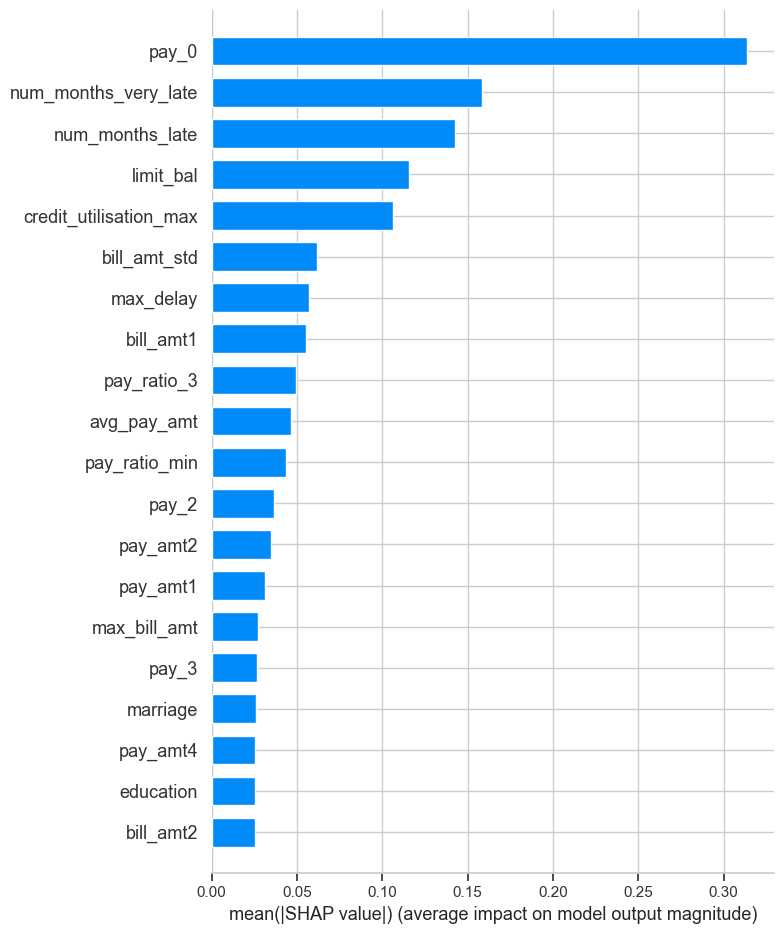

In [82]:
shap.summary_plot(
    shap_values_default,
    X_val_sample,
    plot_type="bar",
    show=True
)

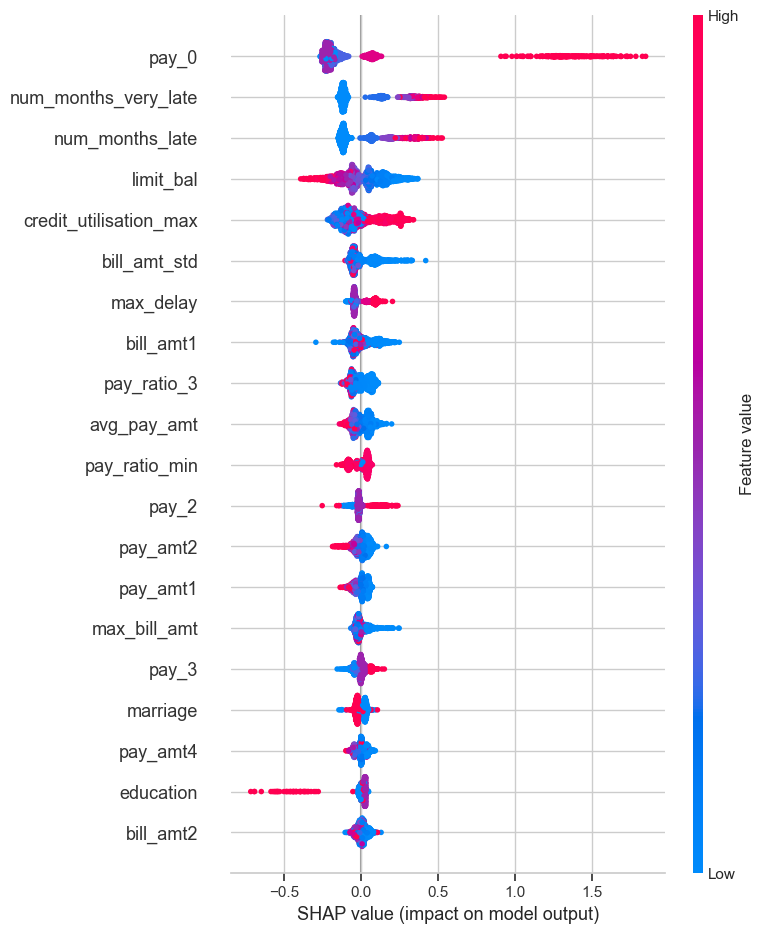

In [83]:
shap.summary_plot(
    shap_values_default,
    X_val_sample,
    show=True
)

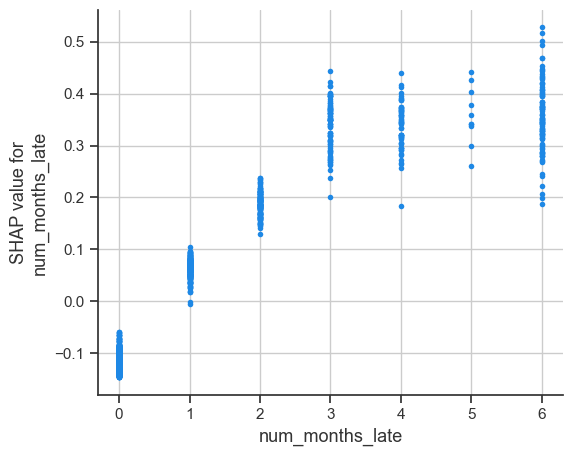

In [84]:
shap.dependence_plot(
    "num_months_late",
    shap_values_default,
    X_val_sample,
    interaction_index=None
)

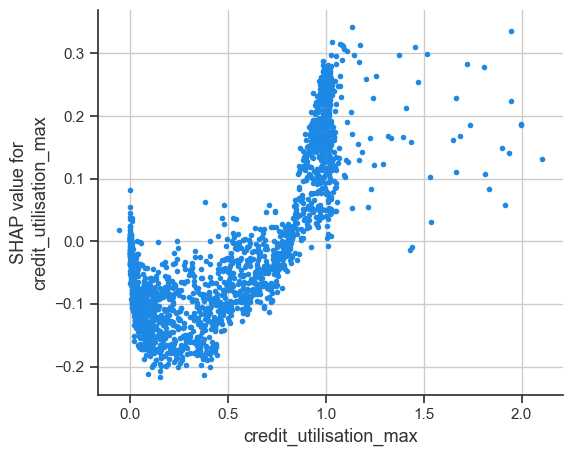

In [85]:
shap.dependence_plot(
    "credit_utilisation_max",
    shap_values_default,
    X_val_sample,
    interaction_index=None
)

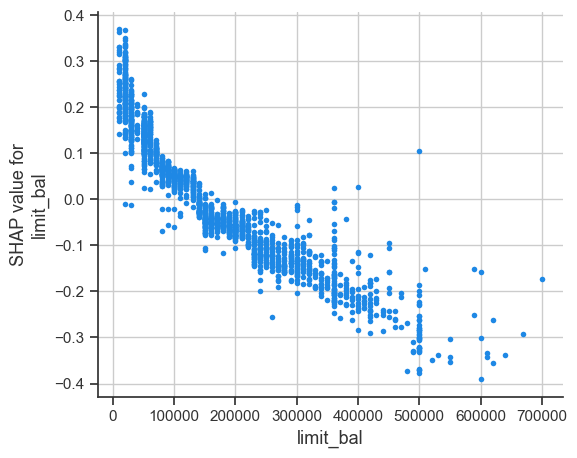

In [86]:
shap.dependence_plot(
    "limit_bal",
    shap_values_default,
    X_val_sample,
    interaction_index=None
)

In [87]:
# predicted probabilities for class 1 (default) on the test set
y_test_proba_cat = cat_fe_model.predict_proba(X_fe_test)[:, 1]

In [88]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc_test = roc_auc_score(y_fe_test, y_test_proba_cat)
avg_precision_test = average_precision_score(y_fe_test, y_test_proba_cat)

print(f"Test ROC AUC:          {roc_auc_test:.4f}")
print(f"Test Average Precision {avg_precision_test:.4f}")

Test ROC AUC:          0.7835
Test Average Precision 0.5636


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred_best = (y_test_proba_cat >= best_threshold).astype(int)

tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_fe_test, y_test_pred_best).ravel()

print("Confusion matrix on TEST at best threshold:")
print(f"TN: {tn_t}, FP: {fp_t}, FN: {fn_t}, TP: {tp_t}\n")

print("Classification report on TEST at best threshold:")
print(classification_report(y_fe_test, y_test_pred_best, digits=3))

Confusion matrix on TEST at best threshold:
TN: 2676, FP: 1997, FN: 265, TP: 1062

Classification report on TEST at best threshold:
              precision    recall  f1-score   support

           0      0.910     0.573     0.703      4673
           1      0.347     0.800     0.484      1327

    accuracy                          0.623      6000
   macro avg      0.629     0.686     0.594      6000
weighted avg      0.785     0.623     0.655      6000



In [90]:
cost_fp = 1.0
cost_fn = 5.0

total_cost_test = cost_fp * fp_t + cost_fn * fn_t
total_cost_test

3322.0

In [91]:
import os

models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)
models_dir

'../models'

In [92]:
import joblib

model_path = os.path.join(models_dir, "catboost_credit_model.pkl")
joblib.dump(cat_fe_model, model_path)
model_path

'../models\\catboost_credit_model.pkl'

In [93]:
import json

metadata = {
    "best_threshold": float(best_threshold),
    "feature_columns": feature_cols_fe,
}

metadata_path = os.path.join(models_dir, "model_metadata.json")

with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=2)

metadata_path

'../models\\model_metadata.json'

In [95]:
train_df = X_fe_train.copy()
train_df["default"] = y_fe_train.values
train_df["cat_proba"] = cat_fe_model.predict_proba(X_fe_train)[:, 1]

test_df = X_fe_test.copy()
test_df["default"] = y_fe_test.values
test_df["cat_proba"] = cat_fe_model.predict_proba(X_fe_test)[:, 1]

train_df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_ratio_5,pay_ratio_6,pay_ratio_mean,pay_ratio_min,pay_ratio_max,num_months_late,num_months_very_late,max_delay,default,cat_proba
10574,10575,20000,2,3,1,51,0,0,0,-2,...,0.000000,0.000000,0.017312,0.000000,0.103869,0,0,0,0,0.175042
11330,11331,300000,1,2,2,31,0,0,0,0,...,0.039327,0.024335,0.035705,0.016848,0.051654,0,0,0,0,0.167914
7127,7128,500000,1,2,2,40,-1,-1,-1,-1,...,1.358864,0.183056,1.009608,0.004069,2.988607,0,0,0,0,0.031747
25150,25151,70000,2,2,1,46,0,0,0,0,...,0.040664,0.037400,0.037400,0.020112,0.052806,0,0,0,0,0.144913
6000,6001,50000,1,2,1,33,0,0,0,0,...,0.071691,0.000000,0.068920,0.000000,0.147732,0,0,0,0,0.154147


In [96]:
top_features = [
    "pay_0",
    "num_months_very_late",
    "num_months_late",
    "limit_bal",
    "credit_utilisation_max",
]

In [97]:
import pandas as pd
import numpy as np

top_features = [
    "pay_0",
    "num_months_very_late",
    "num_months_late",
    "limit_bal",
    "credit_utilisation_max",
]

train_summary = train_df[top_features].describe().T[["mean", "std"]]
test_summary = test_df[top_features].describe().T[["mean", "std"]]

drift_table = train_summary.join(
    test_summary,
    lsuffix="_train",
    rsuffix="_test"
)

drift_table["mean_change_pct"] = (
    (drift_table["mean_test"] - drift_table["mean_train"])
    / drift_table["mean_train"]
    * 100
)

drift_table

,mean_train,std_train,mean_test,std_test,mean_change_pct
pay_0,-0.010889,1.116321,-0.027000,1.126417,147.959184
num_months_very_late,0.714278,1.462982,0.712833,1.484948,-0.202224
num_months_late,0.841444,1.553525,0.828167,1.568242,-1.577974
limit_bal,167373.111111,129566.755366,167962.946667,130698.538357,0.352408
credit_utilisation_max,0.492835,0.429929,0.497606,0.434619,0.968081


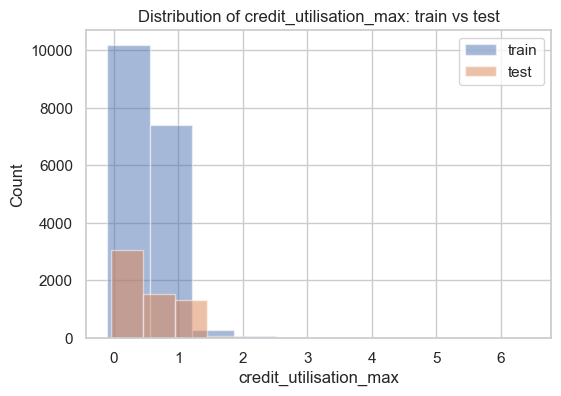

In [98]:
import matplotlib.pyplot as plt

feature = "credit_utilisation_max"

plt.figure(figsize=(6, 4))
train_df[feature].hist(alpha=0.5, label="train")
test_df[feature].hist(alpha=0.5, label="test")
plt.legend()
plt.title(f"Distribution of {feature}: train vs test")
plt.xlabel(feature)
plt.ylabel("Count")
plt.show()

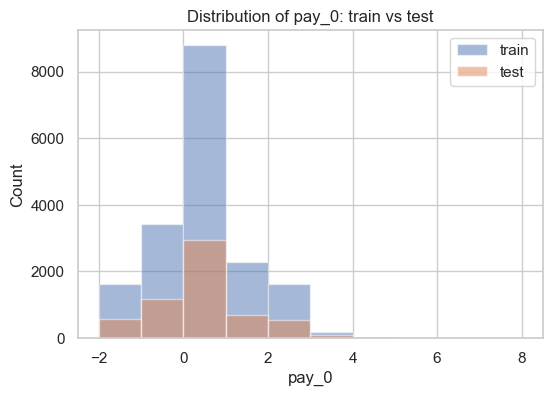

In [99]:
feature = "pay_0"

plt.figure(figsize=(6, 4))
train_df[feature].hist(alpha=0.5, label="train")
test_df[feature].hist(alpha=0.5, label="test")
plt.legend()
plt.title(f"Distribution of {feature}: train vs test")
plt.xlabel(feature)
plt.ylabel("Count")
plt.show()

In [100]:
from sklearn.metrics import roc_auc_score

train_proba = train_df["cat_proba"]
test_proba = test_df["cat_proba"]

auc_train = roc_auc_score(train_df["default"], train_proba)
auc_test = roc_auc_score(test_df["default"], test_proba)

print(f"Train ROC AUC: {auc_train:.4f}")
print(f"Test ROC AUC:  {auc_test:.4f}")

Train ROC AUC: 0.8319
Test ROC AUC:  0.7835
